##    Author : Riasad Alvi
###   22 Jan 2025

In [2]:
from keras.applications.vgg19 import VGG19
# Importing the VGG19 model from the Keras applications module.

# Loading the pre-trained VGG19 model
model = VGG19()
# VGG19: A convolutional neural network with 19 layers (16 convolutional and 3 fully connected).
# Pre-trained on ImageNet, classifies images into 1,000 categories.
# Default input shape: (224, 224, 3), representing RGB images.


In [3]:
model.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 143,667,240 (548.05 MB)

 Trainable params: 143,667,240 (548.05 MB)

 Non-trainable params: 0 (0.00 B)

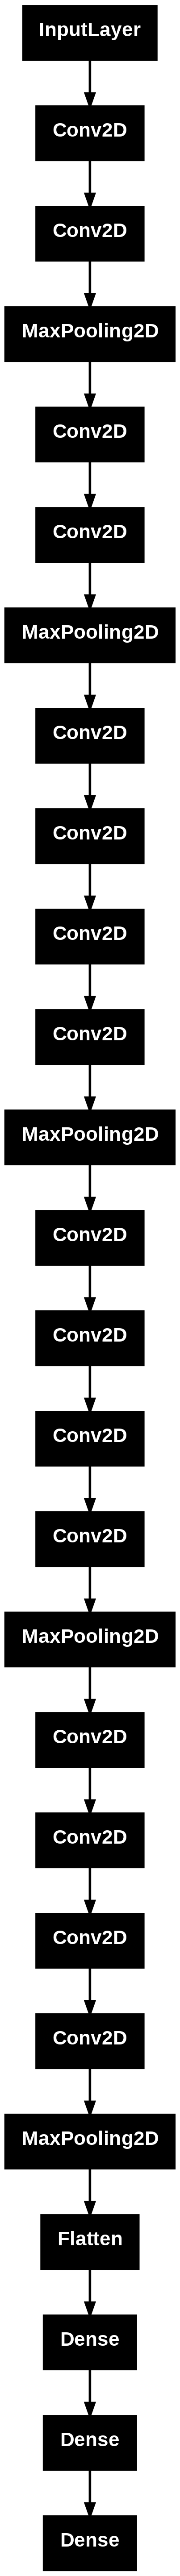

In [5]:
from keras.utils import plot_model
# Importing the `plot_model` function to visualize the architecture of a Keras model.

# Visualizing the VGG19 model architecture
plot_model(model)
# `plot_model`: Generates a graphical representation of the model's architecture.
# `model`: The VGG19 model to be visualized.


In [6]:
for i in range(len(model.layers)):
    # Iterating over all layers in the model using their indices.

    # Check for convolutional layer
    if 'conv' not in model.layers[i].name:
        continue
    # Skips layers that do not have 'conv' in their name (non-convolutional layers).

    # Get filter weights
    filters, biases = model.layers[i].get_weights()
    # Retrieves the filters (weights) and biases for the current convolutional layer.

    print("layer number", i, model.layers[i].name, filters.shape)
    # Prints the layer index, name, and shape of the filter weights for convolutional layers.


layer number 1 block1_conv1 (3, 3, 3, 64)
layer number 2 block1_conv2 (3, 3, 64, 64)
layer number 4 block2_conv1 (3, 3, 64, 128)
layer number 5 block2_conv2 (3, 3, 128, 128)
layer number 7 block3_conv1 (3, 3, 128, 256)
layer number 8 block3_conv2 (3, 3, 256, 256)
layer number 9 block3_conv3 (3, 3, 256, 256)
layer number 10 block3_conv4 (3, 3, 256, 256)
layer number 12 block4_conv1 (3, 3, 256, 512)
layer number 13 block4_conv2 (3, 3, 512, 512)
layer number 14 block4_conv3 (3, 3, 512, 512)
layer number 15 block4_conv4 (3, 3, 512, 512)
layer number 17 block5_conv1 (3, 3, 512, 512)
layer number 18 block5_conv2 (3, 3, 512, 512)
layer number 19 block5_conv3 (3, 3, 512, 512)
layer number 20 block5_conv4 (3, 3, 512, 512)



### **Purpose and Significance**:
- **Purpose**: Identifies convolutional layers in the model and retrieves their filter weights and biases.
- **Significance**:
  - **Model Analysis**: Helps examine the internal structure of convolutional layers (e.g., filter dimensions).
  - **Debugging/Visualization**: Useful for visualizing filters or understanding how the model processes input data.
  - **Fine-tuning**: Facilitates inspection of pre-trained weights for transfer learning or further training.

In [7]:
# Retrieve weights from the second hidden layer
filters, bias = model.layers[1].get_weights()
# `model.layers[1]`: Refers to the second layer in the model.
# `get_weights()`: Extracts the layer's weights (filters) and biases.
# `filters`: Contains the weights (kernels/filters) of the layer.
# `bias`: Contains the bias values associated with the layer.



### **Purpose and Significance**:
- **Purpose**: Extracts the filter weights and biases from the second layer of the model.
- **Significance**:
  - **Analysis**: Allows inspection of how the layer transforms input data.
  - **Visualization**: Useful for visualizing learned filters, especially in convolutional layers.
  - **Fine-tuning**: Facilitates adjusting or reinitializing specific layer weights during training.

In [8]:
# Normalize filter values to range 0-1 for visualization
f_min, f_max = filters.min(), filters.max()
# `filters.min()`: Finds the minimum value in the filter weights.
# `filters.max()`: Finds the maximum value in the filter weights.

filters = (filters - f_min) / (f_max - f_min)
# Normalizes the filter weights to fall between 0 and 1 using min-max normalization.




### **Purpose and Significance**:
- **Purpose**: Scales the filter weights to a range of 0-1 for better visualization.
- **Significance**:
  - **Visualization**: Normalized values are easier to display as images or interpret visually.
  - **Consistency**: Ensures all filters are scaled uniformly for comparison.
  - **Insight**: Allows understanding of the patterns learned by the filters during training.

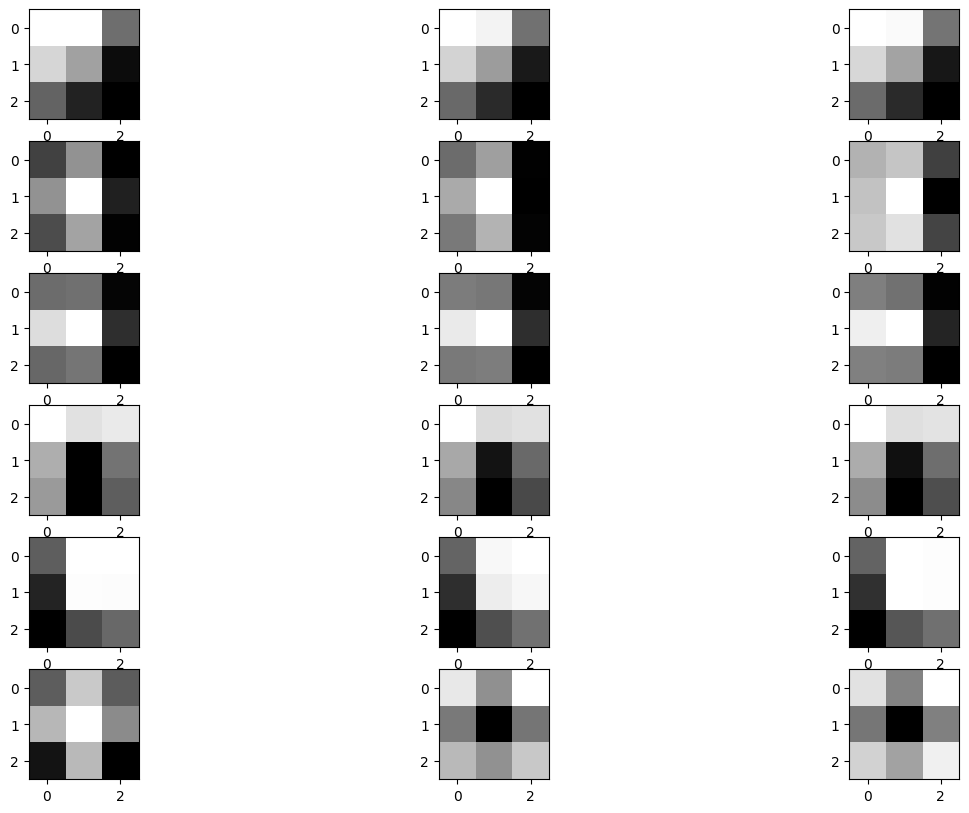

In [11]:
import matplotlib.pyplot as plt # Import the pyplot module

n_filters = 6
# Number of filters to visualize.

ix = 1
# Index for subplot placement.

fig = plt.figure(figsize=(15, 10)) # Use plt instead of pyplot
# Creates a figure with a size of 15x10 inches for better visualization.

for i in range(n_filters):
    # Iterates through the first 6 filters.

    # Get the filter
    f = filters[:, :, :, i]
    # Retrieves the `i-th` filter, which is a 3D array (height, width, depth).

    for j in range(3):
        # Iterates through the 3 channels (e.g., RGB) of the filter.

        # Subplot for 6 filters and 3 channels
        plt.subplot(n_filters, 3, ix) # Use plt instead of pyplot
        # Creates a subplot grid with dimensions `n_filters x 3` and positions the current subplot at `ix`.

        plt.imshow(f[:, :, j], cmap='gray') # Use plt instead of pyplot
        # Displays the `j-th` channel of the `i-th` filter as a grayscale image.

        ix += 1
        # Increments the subplot index.

# Plot the filters
plt.show() # Use plt instead of pyplot
# Displays all subplots containing the visualized filter channels.



### **Purpose and Significance**:
- **Purpose**: Visualizes the first 6 filters of the layer, including their 3 individual channels.
- **Significance**:
  - **Filter Insights**: Helps understand the features learned by each filter, such as edges, textures, or patterns.
  - **Visualization**: Breaks down filters into channels (e.g., RGB) for detailed analysis.
  - **Debugging**: Ensures filters are functioning as intended, particularly in convolutional layers.

In [12]:
from tensorflow.keras.models import Model

# Create a new model to extract outputs from the second layer
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
# `Model`: A Keras utility to define a new model with customized inputs and outputs.
# `inputs=model.inputs`: Keeps the original model's input layer as the input.
# `outputs=model.layers[1].output`: Sets the second layer's output as the new model's output.



### **Purpose and Significance**:
- **Purpose**: Creates a new model that outputs the feature maps generated by the second layer.
- **Significance**:
  - **Feature Map Extraction**: Useful for visualizing intermediate activations and understanding how data transforms layer by layer.
  - **Debugging**: Helps identify issues in specific layers by examining their outputs.
  - **Analysis**: Provides insights into the features learned by individual layers, aiding interpretability of the model.

In [14]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from numpy import expand_dims
from tensorflow.keras.applications.vgg19 import preprocess_input

# Load the image and resize it to the target size of (224, 224)
image = load_img("/content/Trump.jpg", target_size=(224, 224))
# `load_img`: Loads the image from the given path and resizes it to (224, 224) pixels for model input.

# Convert the image to an array
image = img_to_array(image)
# `img_to_array`: Converts the loaded image to a numpy array, representing pixel data.

# Expand dimensions so that it represents a single 'sample'
image = expand_dims(image, axis=0)
# `expand_dims`: Adds an extra dimension to the image array to represent a batch of size 1 (required for model input).

# Preprocess the image for the model's input requirements (e.g., normalization for VGG, ResNet)
image = preprocess_input(image)
# `preprocess_input`: Prepares the image according to the model's pre-processing standards (e.g., subtracting mean values).



### **Purpose and Significance**:
- **Purpose**: Prepares an image for input into a pre-trained model, ensuring the correct shape and preprocessing.
- **Significance**:
  - **Resizing**: Ensures the image is the correct size for the model (e.g., VGG, ResNet requires 224x224).
  - **Array Conversion**: Converts the image into a numerical format that a model can process.
  - **Batch Expansion**: Prepares the image as a batch of size 1, aligning with the model’s input expectations.
  - **Preprocessing**: Normalizes the image according to the model’s training procedure, improving model performance and consistency.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


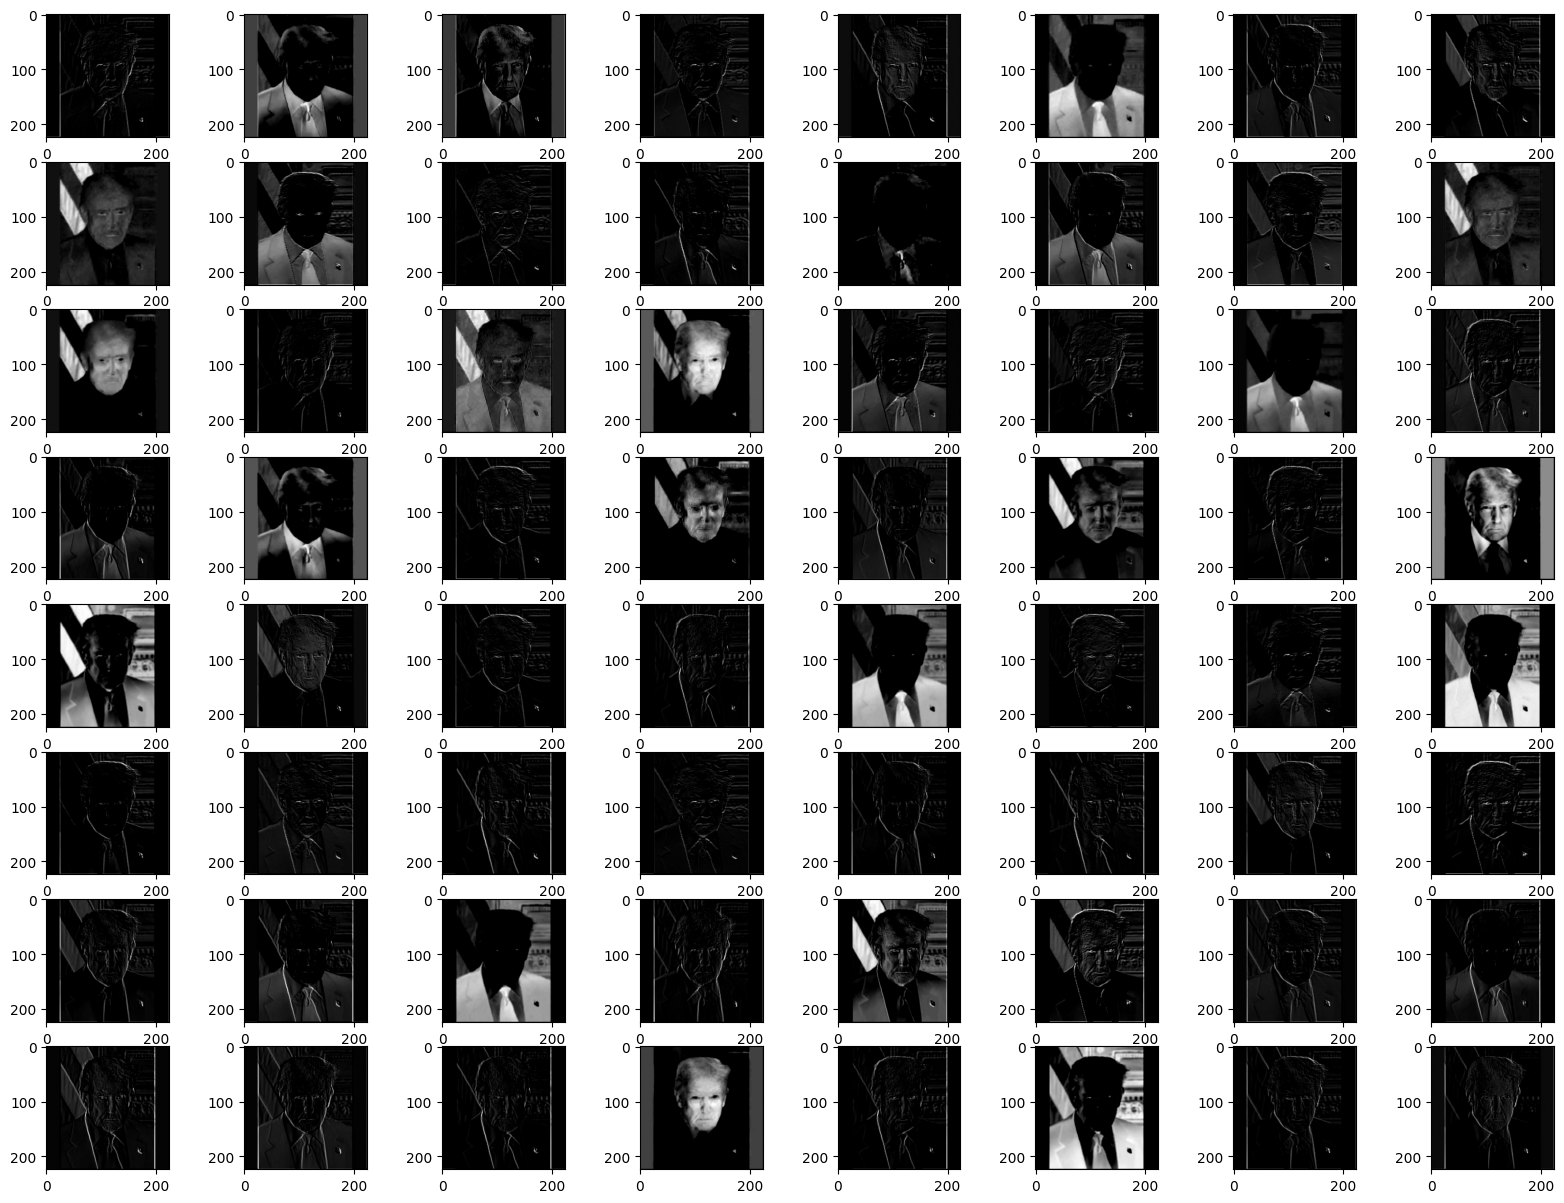

In [18]:
# Calculating the feature map for the input image
features = model.predict(image)
# `model.predict(image)`: Passes the image through the model and retrieves the output (features) from the second layer.
# `features.shape[3]`: Refers to the number of channels or feature maps produced by the second layer.

# Import pyplot
import matplotlib.pyplot as plt

# Create a figure for visualizing the feature maps
fig = plt.figure(figsize=(20, 15)) # Use plt instead of pyplot
# `plt.figure`: Initializes a figure with a specified size (20x15 inches).

# Iterate through each feature map and display it
for i in range(1, features.shape[3] + 1):
    # Loop through all feature maps (channels) in the output, starting from 1.

    plt.subplot(8, 8, i) # Use plt instead of pyplot
    # Creates a subplot grid of size 8x8 and positions the `i-th` feature map in the grid.

    plt.imshow(features[0, :, :, i - 1], cmap='gray') # Use plt instead of pyplot
    # `features[0, :, :, i - 1]`: Extracts the `i-th` feature map from the first image in the batch (index 0).
    # `cmap='gray'`: Displays the feature map as a grayscale image.

# Display the feature maps
plt.show() # Use plt instead of pyplot
# `plt.show()`: Displays the grid of feature maps.


### **Purpose and Significance**:
- **Purpose**: Visualizes the feature maps (activations) from the second layer of the model for a given input image.
- **Significance**:
  - **Feature Interpretation**: Helps in understanding what patterns or features the model has learned in early layers (e.g., edges, textures).
  - **Model Analysis**: Provides insights into the model's internal workings and how it processes an image.
  - **Debugging and Improvement**: Useful in diagnosing issues with the model’s performance and potentially refining the architecture.

In [19]:
model2 = VGG19()

In [20]:
# Specify the layer indices for which we want to extract the outputs
layer_index = [2, 5, 9, 13, 17]
# `layer_index`: A list of indices corresponding to the layers whose outputs we want to visualize or analyze.

# Create a list of outputs from the specified layers
outputs = [model2.layers[i].output for i in layer_index]
# `outputs`: Retrieves the output of each specified layer from `model2` and stores them in a list.

# Define a new model that takes the same inputs as `model2` and outputs the features from the selected layers
model3 = Model(inputs=model2.inputs, outputs=outputs)
# `Model`: Creates a new Keras model with `model2`'s input layer and the outputs from the selected layers.



### **Purpose and Significance**:
- **Purpose**: Defines a new model (`model3`) that extracts and outputs feature maps from specific layers of an existing model (`model2`).
- **Significance**:
  - **Layer Feature Extraction**: Useful for inspecting intermediate features and understanding how different layers process the input data.
  - **Model Analysis**: Allows you to inspect and visualize how data flows through different layers of a deep network.
  - **Fine-grained Insights**: Provides detailed insights into the activations of specific layers, which can be useful for debugging, model improvement, or interpretability tasks.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 871ms/step


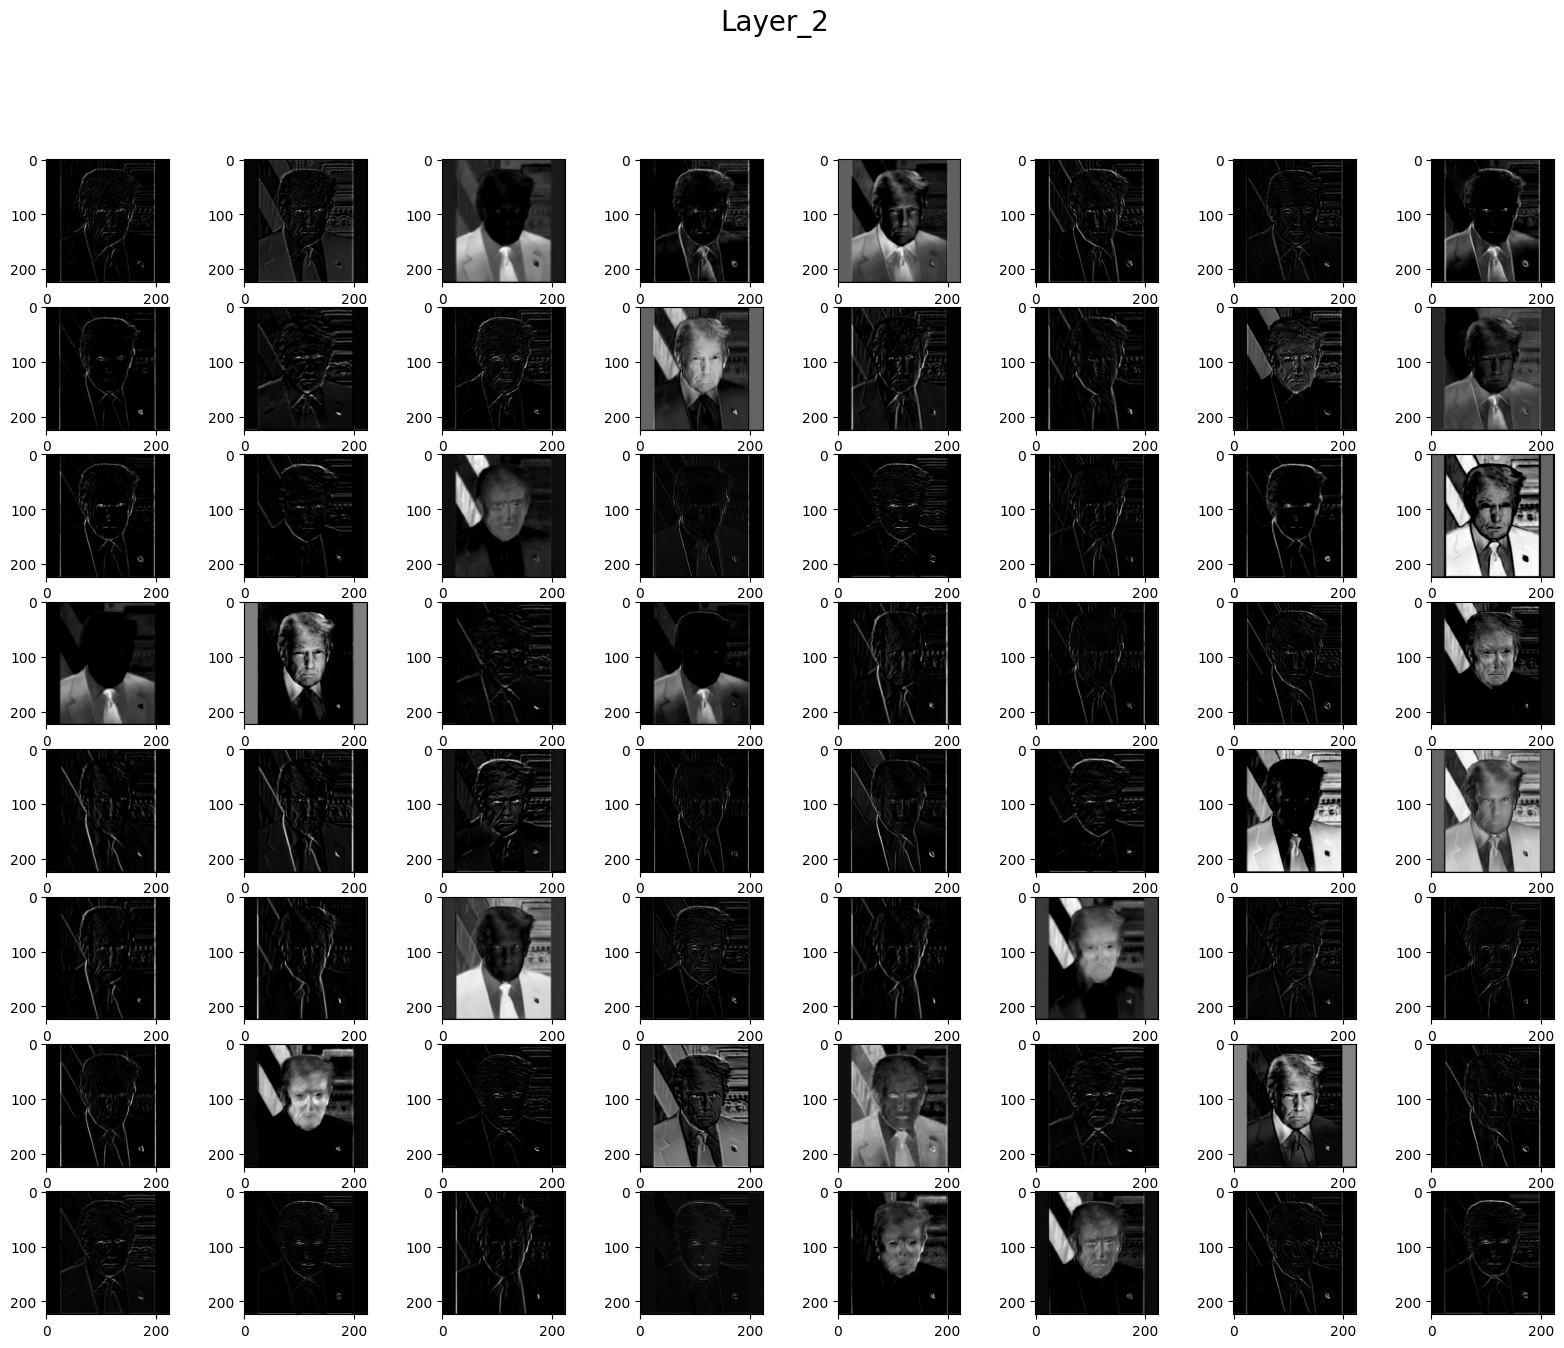

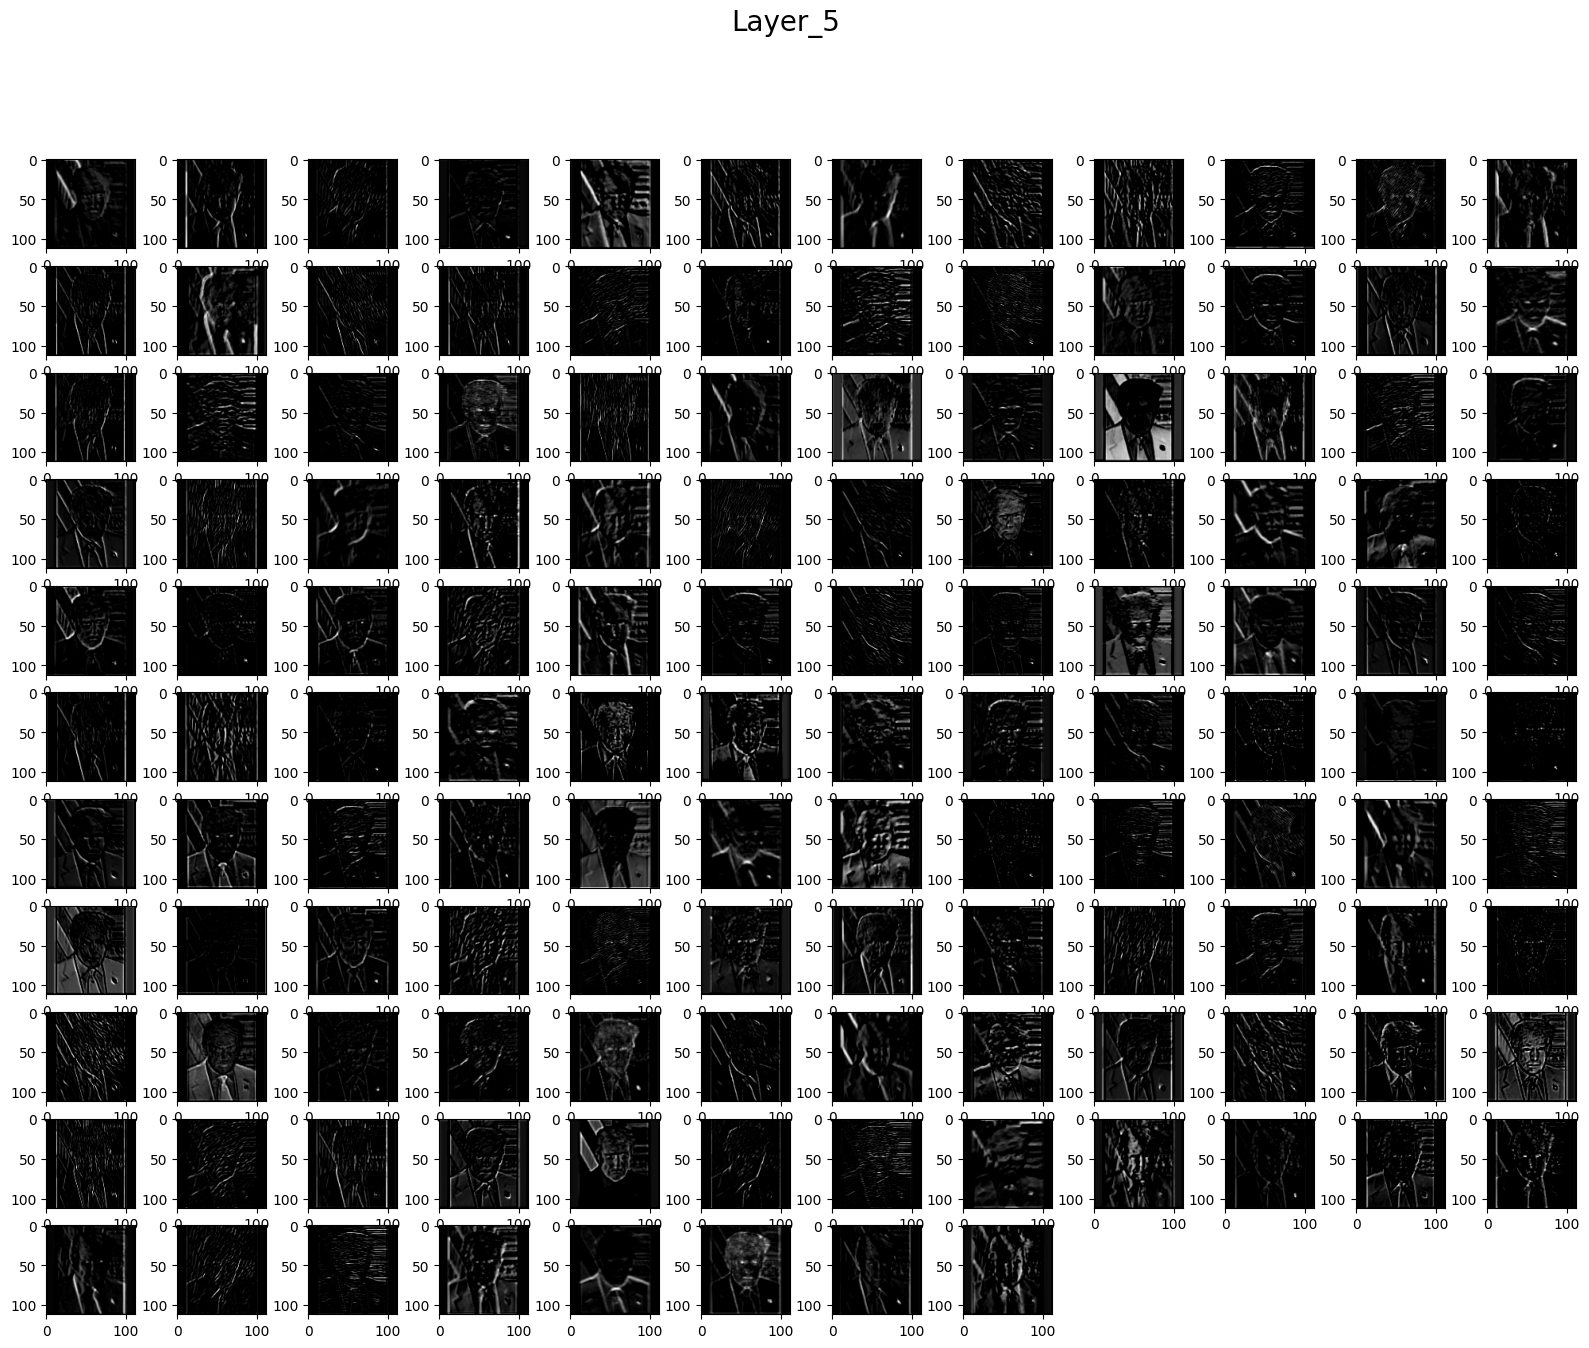

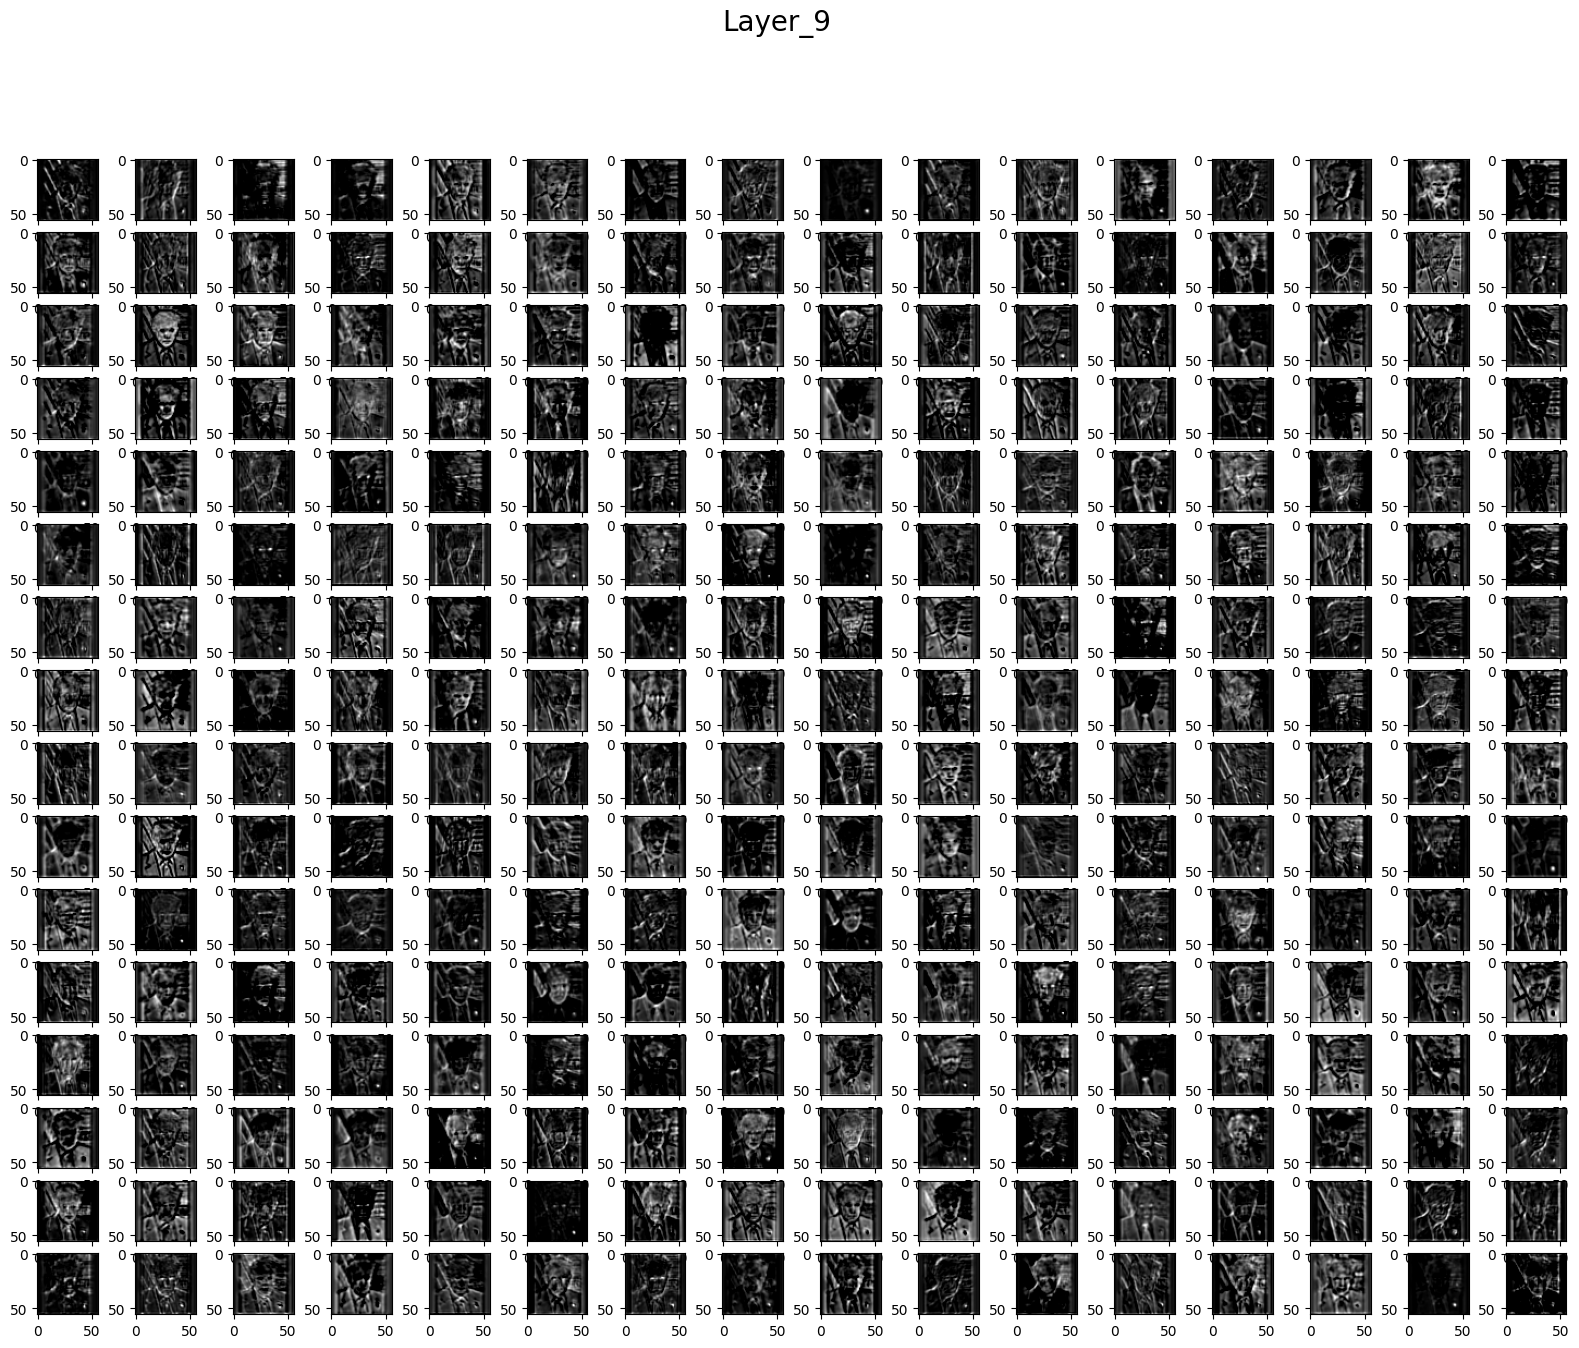

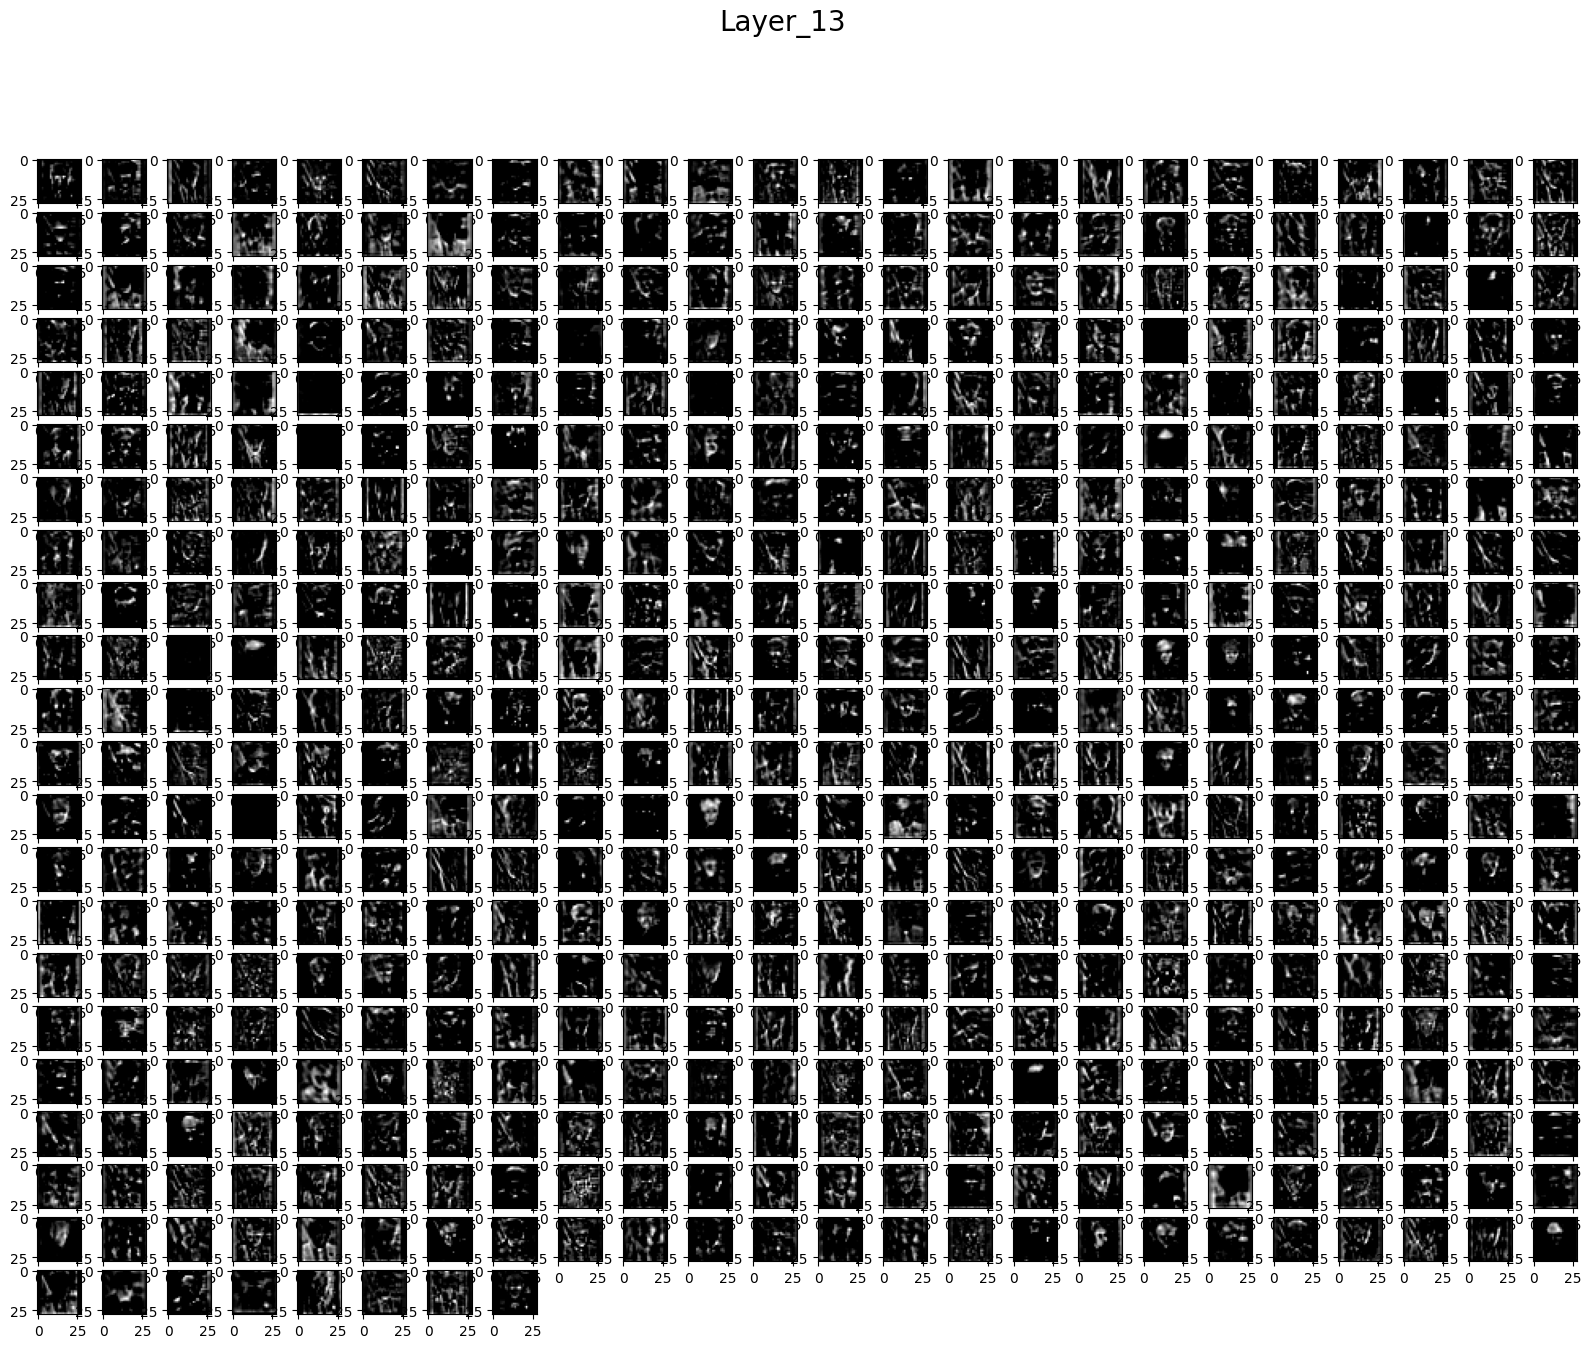

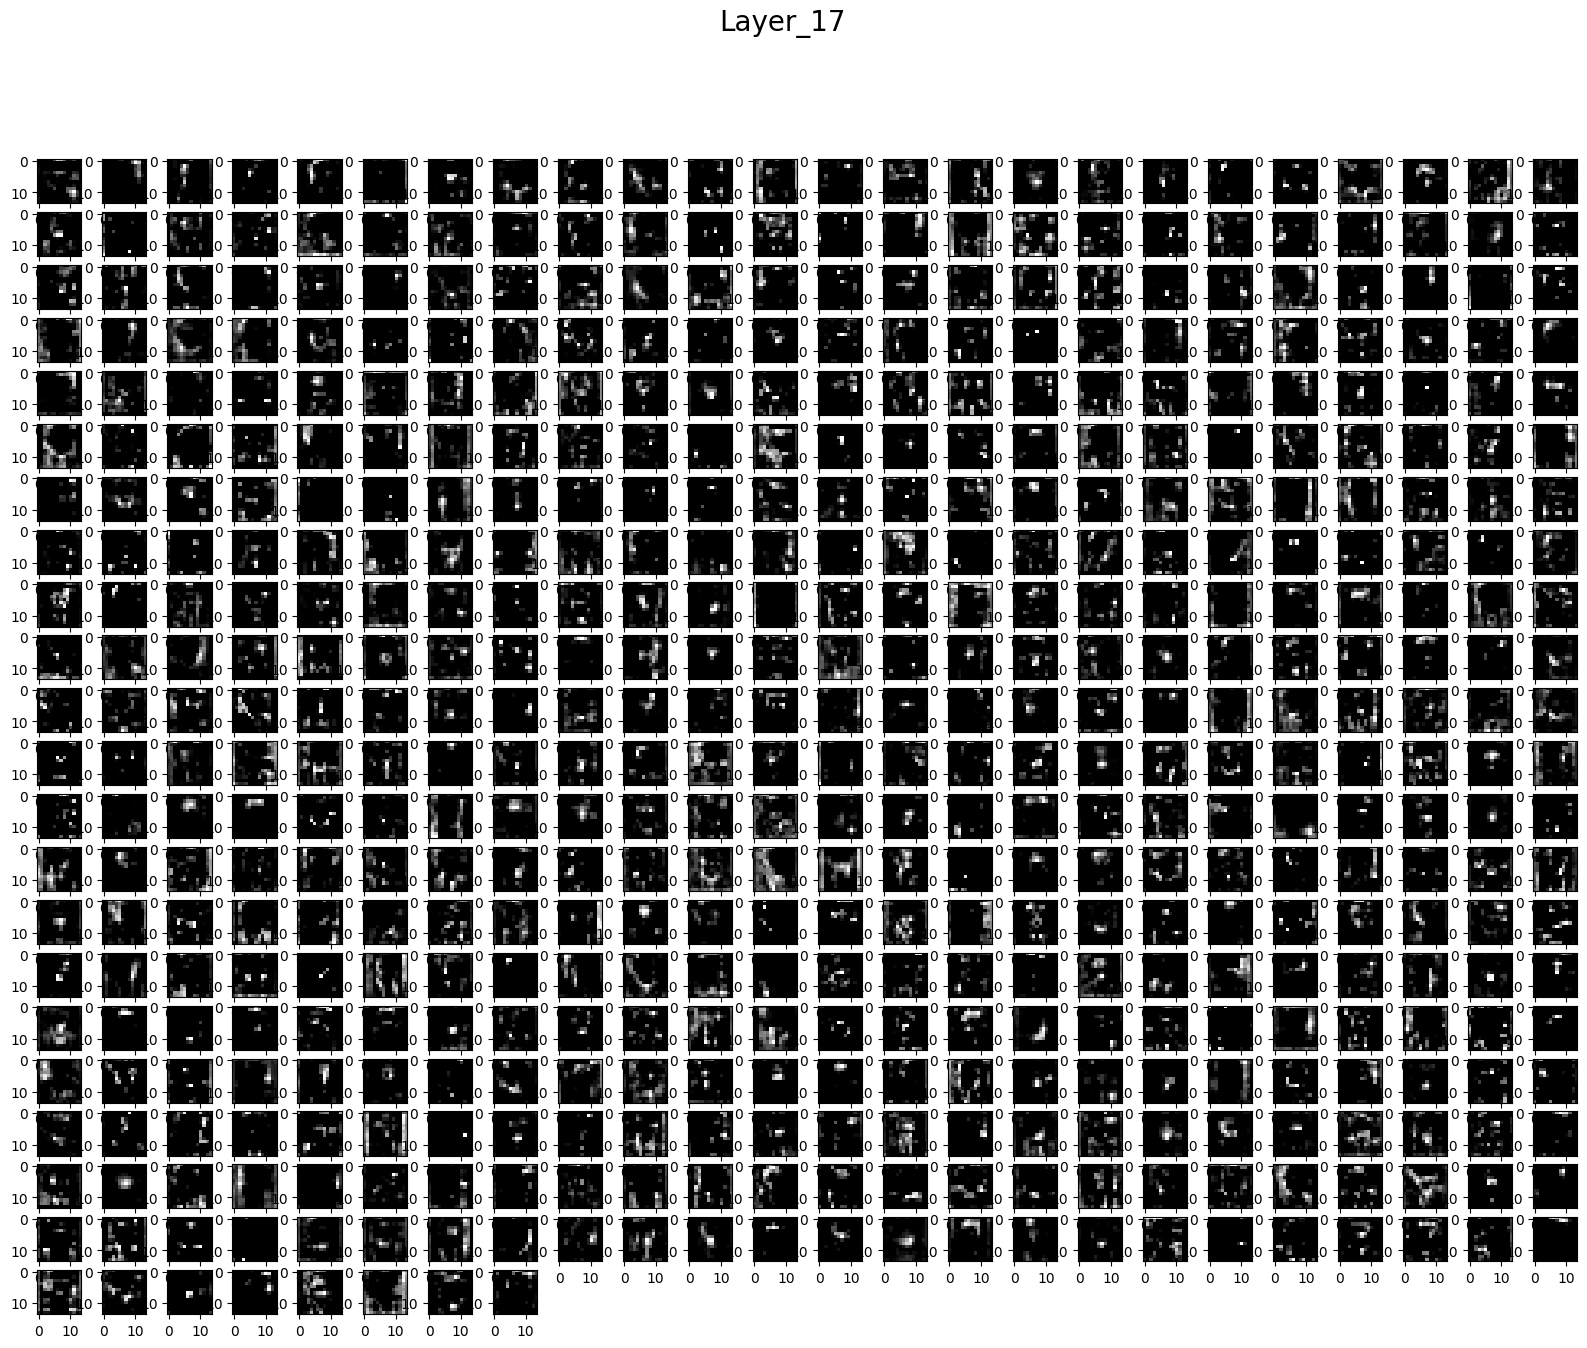

In [24]:
# Get the feature maps by predicting the outputs from the selected layers
feature_map = model3.predict(image)
# `model3.predict(image)`: Passes the input image through `model3` and retrieves the feature maps from the specified layers.

# Import pyplot
import matplotlib.pyplot as plt  # Import the pyplot module and alias it as plt

# Loop through the layer indices and their corresponding feature maps
for layer_idx, fmap in zip(layer_index, feature_map):
    # `zip(layer_index, feature_map)`: Combines layer indices with their corresponding feature maps.

    # Create a new figure for each layer's feature maps
    fig = plt.figure(figsize=(20, 15))  # Use plt instead of pyplot
    # `plt.figure`: Initializes a figure with the specified size (20x15 inches).

    fig.suptitle("Layer_{}".format(layer_idx), fontsize=20)
    # Adds a title to the figure indicating the layer number being visualized.

    # Calculate the number of rows and columns for the subplot grid
    num_filters = fmap.shape[3]
    num_rows = int(num_filters**0.5)  # Calculate the number of rows (square root of filters)
    num_cols = (num_filters + num_rows - 1) // num_rows  # Calculate the number of columns

    # Loop through each feature map (channel) of the current layer and display it
    subplot_index = 1  # Initialize subplot index counter
    for filter_idx in range(num_filters):
        # `fmap.shape[3]`: Refers to the number of channels in the feature map
        # (corresponding to the number of filters in the layer).

        plt.subplot(num_rows, num_cols, subplot_index)  # Use calculated grid dimensions
        # Creates a subplot grid and positions the `subplot_index`-th feature map in the grid.

        plt.imshow(fmap[0, :, :, filter_idx], cmap='gray')  # Use plt instead of pyplot
        # `fmap[0, :, :, filter_idx]`: Extracts the `filter_idx`-th feature map
        # from the first image in the batch (index 0).
        # `cmap='gray'`: Displays the feature map in grayscale.

        subplot_index += 1  # Increment subplot index counter

# Display all the feature maps
plt.show()  # Use plt instead of pyplot
# `plt.show()`: Displays the grid of feature maps for each selected layer.